# CAVIAR Network

* **Contexto**:
- Este conjunto de datos es una red criminal variable en el tiempo que es repetidamente perturbada por las fuerzas policiales. La investigación CAVIAR duró dos años y se llevó a cabo desde 1994 hasta 1996. La operación reunió unidades de investigación de la policía de Montréal y la Real Policía Montada de Canadá. Durante este período de dos años, se obtuvieron 11 órdenes de escuchas telefónicas, válidas por aproximadamente dos meses cada una (las 11 matrices contenidas en phase1.csv y phase2.csv corresponden a estas once fases de escuchas telefónicas de dos meses).

* **Contenido**:
- Este caso es interesante porque, a diferencia de otras estrategias de investigación, el mandato del proyecto CAVIAR era incautar las drogas sin arrestar a los perpetradores. Durante este período, las importaciones de la red de tráfico fueron golpeadas por la policía en once ocasiones. Los arrestos se llevaron a cabo solo al final de la investigación. Las pérdidas monetarias para los traficantes se estimaron en 32 millones de dólares. Se llevaron a cabo once incautaciones a lo largo de la investigación. Algunas fases no incluyeron incautaciones y otras incluyeron múltiples.

The following summarizes the seizures:

* Phase 4 1 seizure $2,500,000 300 kg of marijuana
* Phase 6 3 seizures $1,300,000 2 x 15 kg of marijuana + 1 x 2 kg of cocaine
* Phase 7 1 seizure $3,500,000 401 kg of marijuana
* Phase 8 1 seizure $360,000 9 kg of cocaine
* Phase 9 2 seizures $4,300,000 2 kg of cocaine + 1 x 500 kg marijuana
* Phase 10 1 seizure $18,700,000 2200 kg of marijuana
* Phase 11 2 seizures $1,300,000 12 kg of cocaine + 11 kg of cocaine

Este caso ofrece una rara oportunidad para estudiar una red criminal en convulsión debido a las fuerzas policiales. Esto nos permite analizar los cambios en la estructura de la red y examinar la reacción y adaptación de los participantes mientras estaban sometidos a un número creciente de restricciones angustiantes.

La red consta de 110 jugadores (numerados). Los jugadores del 1 al 82 son los traficantes. Los jugadores del 83 al 110 son los no traficantes (inversores financieros; contadores; propietarios de varios negocios de importación, etc.). Inicialmente, la investigación apuntó a Daniel Serero, el supuesto cerebro de una red de drogas en el centro de Montréal, quien intentó importar marihuana a Canadá desde Marruecos, transitando por España. Después de la primera incautación, que ocurrió en la Fase 4, los traficantes reorientaron su enfoque hacia la importación de cocaína desde Colombia, transitando por los Estados Unidos.

Según la policía, el rol de 23 de los jugadores en la "organización Serero" es el siguiente, listado por nombre (identificación única):

* Daniel Serero (n1) : Mastermind of the network.

* Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

* Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

* Wallace Lee (n85) : Takes care of financial affairs (accountant).

* Gaspard Lino (n6): Broker in Spain.

* Samir Rabbat (n11): Provider in Morocco.

* Lee Gilbert (n88): A trusted man of Wallace Lee (became an informer after the arrest).

* Beverly Ashton (n106): Spouse of Lino, transports money and documents.

* Antonio Iannacci (n89): Investor.

* Mohammed Echouafni (n84): Moroccan investor.

* Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

* Roderik Janouska (n77): Individual with airport contacts.

* Patrick Lee (n87): Investor.

* Salvatore Panetta (n82): Transport arrangements manager.

* Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

* Ernesto Morales (n12): Principal organizer of the cocaine import, an intermediary between the Colombians and the Serero organization.

* Oscar Nieri (n17): The handyman of Morales.

* Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

* Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

* Johnny Pacheco (n16): Cocaine provider.

En los archivos de datos (phase1.csv, phase2.csv, ), encontrarás matrices que reportan el número de correspondencias intervenidas entre los jugadores mencionados en la red, donde los jugadores están identificados por su identificación única. Estarás analizando esta red variable en el tiempo, proporcionando un esbozo aproximado de su estructura, su evolución y el rol de los actores en ella.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random

In [139]:
## Plotting tools
%matplotlib inline
#from bokeh.io import output_notebook, show, export_png, output_file
#output_notebook()
#from bokeh.plotting import figure
#from bokeh.layouts import gridplot, column, row
#from bokeh.models import Div
#from bokeh.models import LinearAxis, Range1d
#from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Import data processing packages
import pandas as pd
import numpy as np

#Import network packages
import networkx as nx

# Install pygraphviz
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [140]:
# Download save and compute Phase Data

"""
Adjacency matrices are saved as variables phase1, phase2, phase3 etc.
Their corresponding Graphs/Networks are saved as G1, G2, G3 etc.

"""
phases = {}
G = {}
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1,12):
  var_name = "phase" + str(i)


  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())

In [141]:
G_summaries

{'Nodes': [15, 24, 33, 33, 32, 27, 36, 42, 34, 42, 41],
 'Edges': [18, 28, 56, 48, 39, 47, 49, 58, 44, 50, 50]}

In [142]:
G

{1: <networkx.classes.graph.Graph at 0x7cc297dceb30>,
 2: <networkx.classes.graph.Graph at 0x7cc29d7e90f0>,
 3: <networkx.classes.graph.Graph at 0x7cc29d7e9f60>,
 4: <networkx.classes.graph.Graph at 0x7cc296e84490>,
 5: <networkx.classes.graph.Graph at 0x7cc29d7ea1a0>,
 6: <networkx.classes.graph.Graph at 0x7cc29d7ebe20>,
 7: <networkx.classes.graph.Graph at 0x7cc297fd1960>,
 8: <networkx.classes.graph.Graph at 0x7cc297fd18a0>,
 9: <networkx.classes.graph.Graph at 0x7cc297fd2e00>,
 10: <networkx.classes.graph.Graph at 0x7cc297fd2b90>,
 11: <networkx.classes.graph.Graph at 0x7cc297fd3250>}

1. ¿Cuántos nodos y bordes hay en la red en cada fase?

In [143]:
G_summaries

{'Nodes': [15, 24, 33, 33, 32, 27, 36, 42, 34, 42, 41],
 'Edges': [18, 28, 56, 48, 39, 47, 49, 58, 44, 50, 50]}

In [144]:
pd.DataFrame(G_summaries, range(1, 12))

,Nodes,Edges
1,15,18
2,24,28
3,33,56
4,33,48
5,32,39
6,27,47
7,36,49
8,42,58
9,34,44
10,42,50


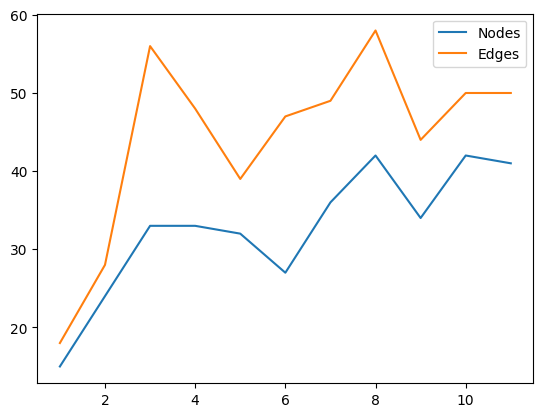

In [145]:
# Veamos la distribución en el tiempo
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes")
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.legend()
plt.show()

2. ¿Cuál es el nodo con mayor grado de centralidad en la red global en todas las fases? ¿Y en cada fase?

In [147]:
global_max_degree_node = None
global_max_degree = -1

for phase, graph in G.items():
    degree_centrality = nx.degree_centrality(graph)
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    max_degree = degree_centrality[max_degree_node]

    if max_degree > global_max_degree:
        global_max_degree_node = max_degree_node
        global_max_degree = max_degree

    print(f"Fase {phase}: Nodo con mayor grado de centralidad = {max_degree_node} (Grado = {max_degree:.4f})")

print(f"Nodo global con mayor grado de centralidad = {global_max_degree_node} (Grado = {global_max_degree:.4f})")

Fase 1: Nodo con mayor grado de centralidad = n1 (Grado = 0.8571)
Fase 2: Nodo con mayor grado de centralidad = n1 (Grado = 0.8261)
Fase 3: Nodo con mayor grado de centralidad = n1 (Grado = 0.8438)
Fase 4: Nodo con mayor grado de centralidad = n1 (Grado = 0.7188)
Fase 5: Nodo con mayor grado de centralidad = n1 (Grado = 0.7097)
Fase 6: Nodo con mayor grado de centralidad = n1 (Grado = 0.6923)
Fase 7: Nodo con mayor grado de centralidad = n1 (Grado = 0.6857)
Fase 8: Nodo con mayor grado de centralidad = n1 (Grado = 0.4878)
Fase 9: Nodo con mayor grado de centralidad = n3 (Grado = 0.3333)
Fase 10: Nodo con mayor grado de centralidad = n1 (Grado = 0.3171)
Fase 11: Nodo con mayor grado de centralidad = n12 (Grado = 0.3000)
Nodo global con mayor grado de centralidad = n1 (Grado = 0.8571)


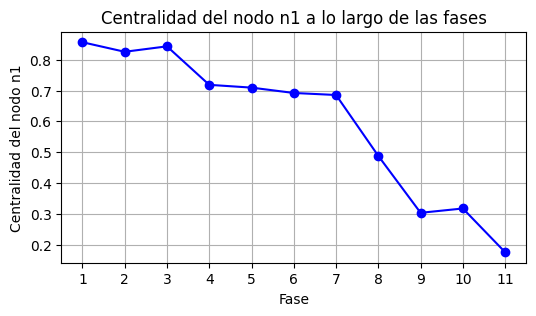

In [148]:
# Calcular la centralidad del nodo n1 en cada fase
n1_centrality = []
for phase, graph in G.items():
    degree_centrality = nx.degree_centrality(graph)
    n1_centrality.append(degree_centrality['n1'])  # Obtener la centralidad del nodo n1 (nodo con id 1)

# Plotear la centralidad del nodo n1 a lo largo de las fases
plt.figure(figsize=(6, 3))
plt.plot(range(1,12), n1_centrality, marker='o', linestyle='-', color='b')
plt.xlabel('Fase')
plt.ylabel('Centralidad del nodo n1')
plt.title('Centralidad del nodo n1 a lo largo de las fases')
plt.xticks(range(1,12))
plt.grid(True)
plt.show()

In [149]:
# Responder a la pregunta: ¿Cuál es el nodo con mayor intermediación de centralidad (betweenness_centrality) en la red global en todas las fases?
global_max_betweenness_node = None
global_max_betweenness = -1

for phase, graph in G.items():
    betweenness_centrality = nx.betweenness_centrality(graph)
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    max_betweenness = betweenness_centrality[max_betweenness_node]

    if max_betweenness > global_max_betweenness:
        global_max_betweenness_node = max_betweenness_node
        global_max_betweenness = max_betweenness

    print(f"Fase {phase}: Nodo con mayor intermediación de centralidad = {max_betweenness_node} (Intermediación = {max_betweenness:.4f})")

print(f"Nodo global con mayor intermediación de centralidad = {global_max_betweenness_node} (Intermediación = {global_max_betweenness:.4f})")

Fase 1: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.9066)
Fase 2: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.9427)
Fase 3: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8295)
Fase 4: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8393)
Fase 5: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8839)
Fase 6: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5426)
Fase 7: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5894)
Fase 8: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5537)
Fase 9: Nodo con mayor intermediación de centralidad = n3 (Intermediación = 0.5762)
Fase 10: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.3427)
Fase 11: Nodo con mayor intermediación de centralidad = n41 (Intermediación = 0.5541)
Nodo global con mayor intermediación de centralidad = n1 (Intermediación 

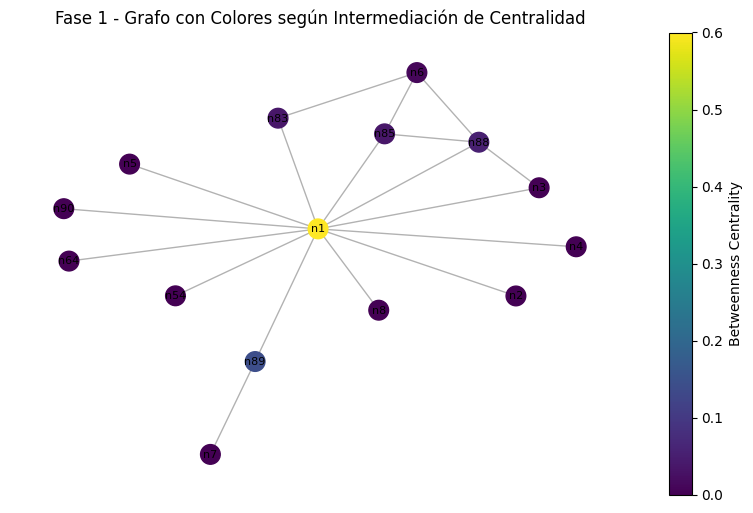

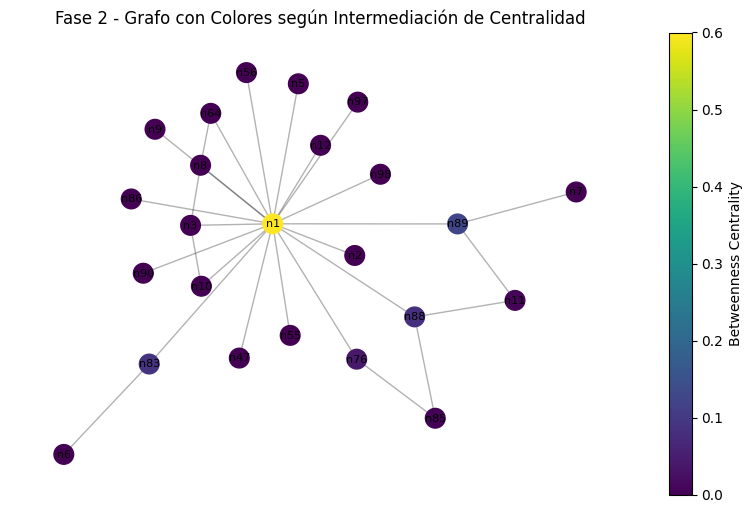

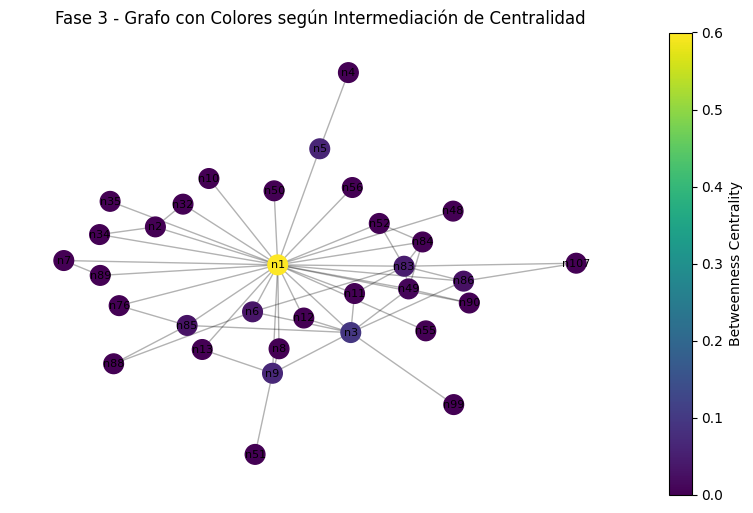

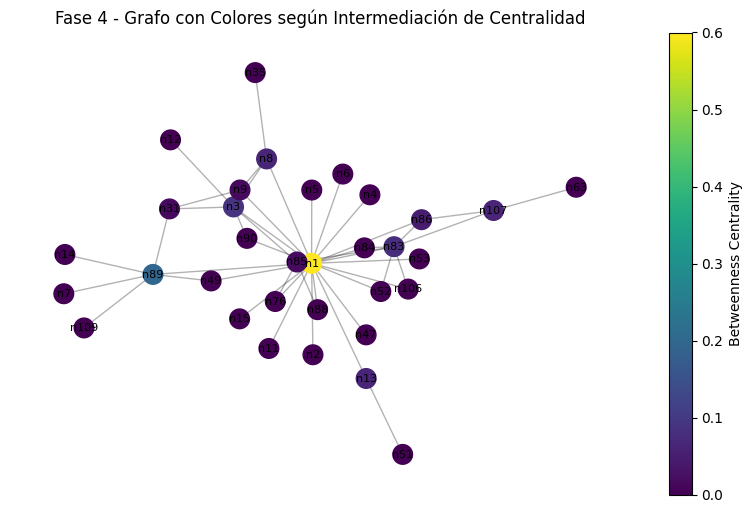

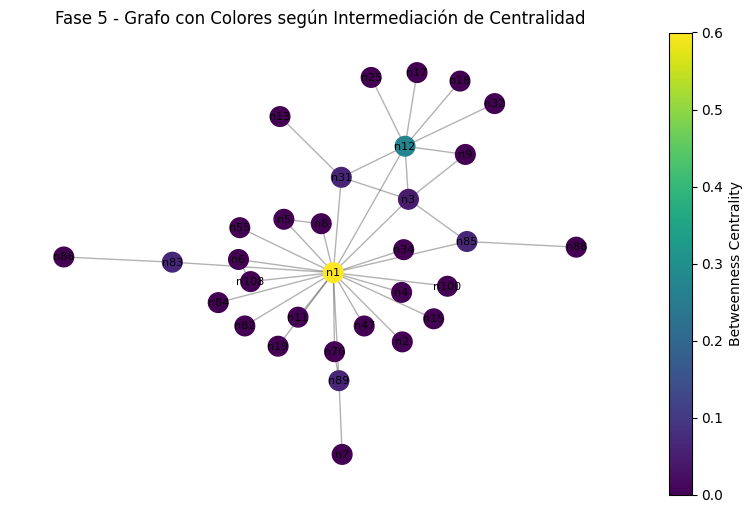

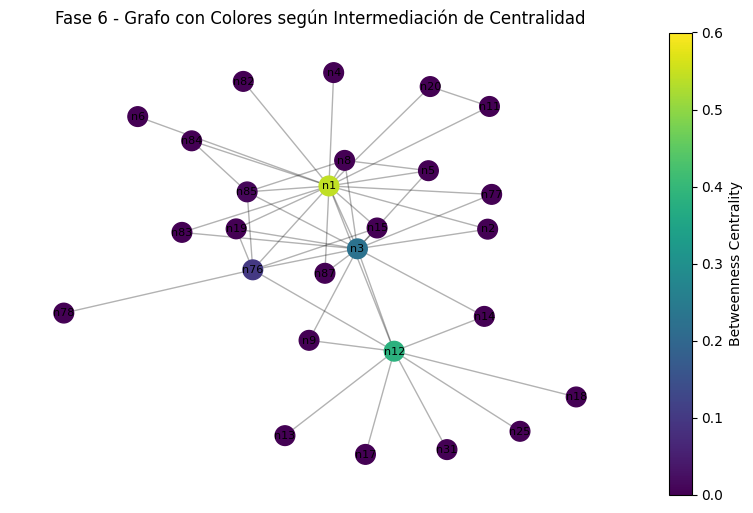

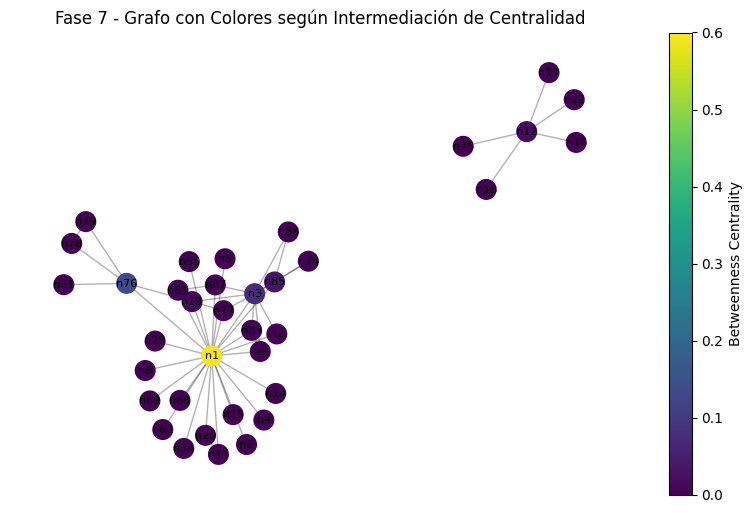

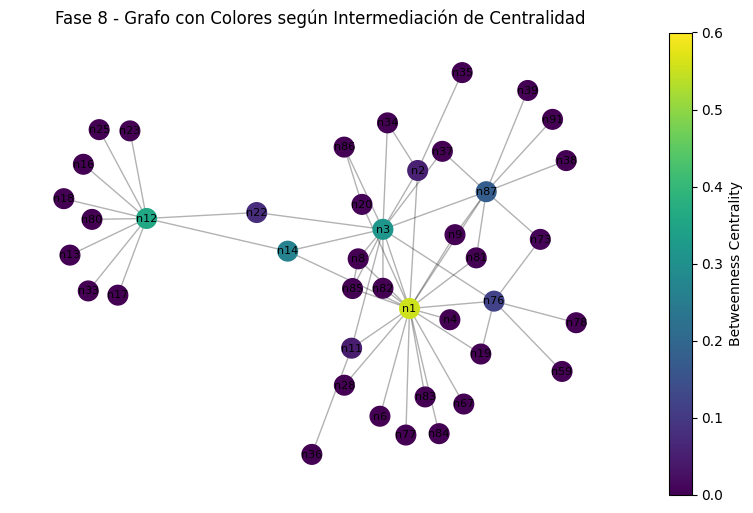

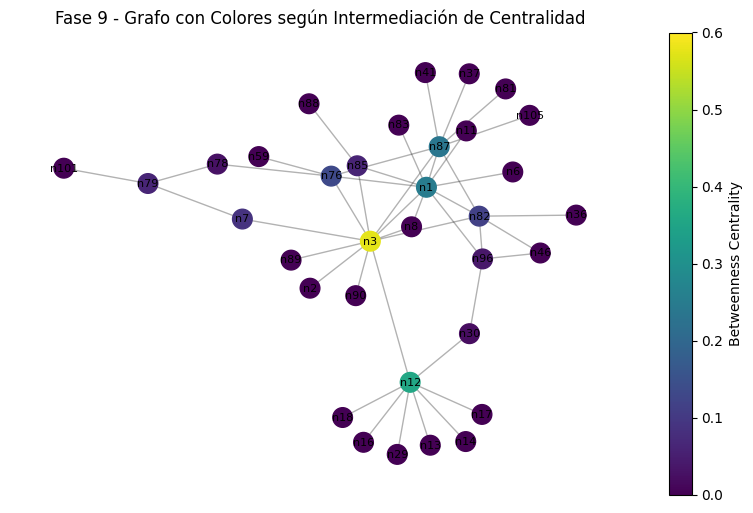

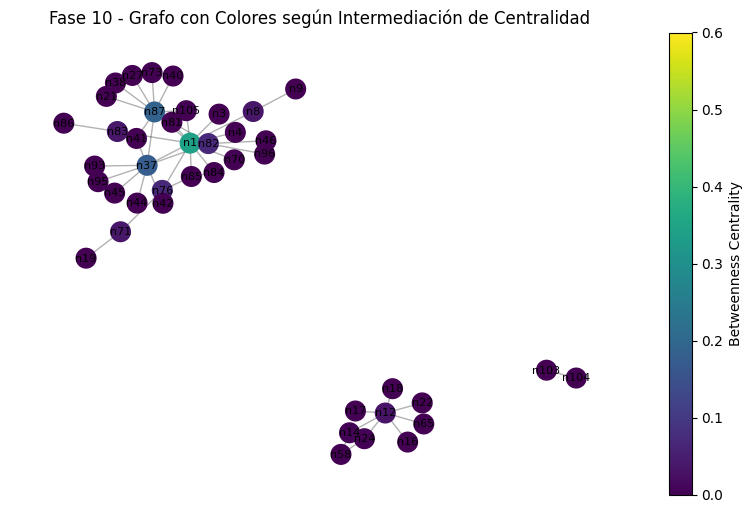

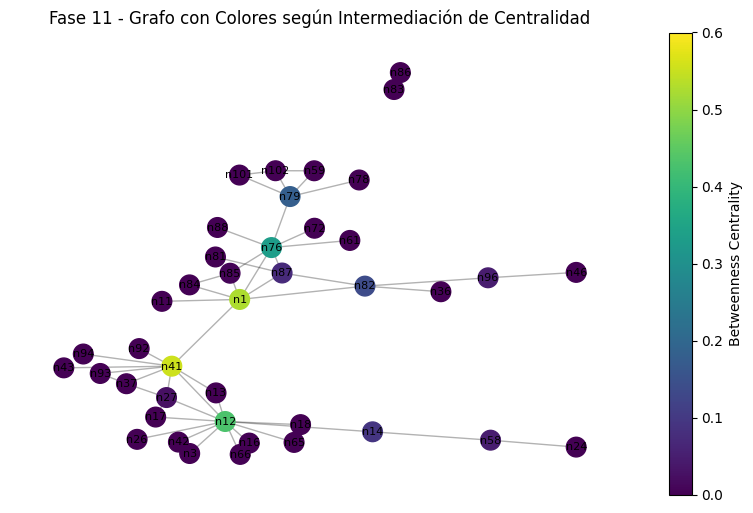

In [150]:
# Crear plots con color según la intermediación de centralidad en cada fase (betweenness_centrality: mide cuánto controla o influencia un nodo el flujo de información
#o recursos entre otros nodos en la red. Un nodo con una alta intermediación es crucial para mantener la conectividad y la eficiencia en la red, ya que muchos caminos
#pasan a través de él.)
for phase, graph in G.items():
    betweenness_centrality = nx.betweenness_centrality(graph)

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph, seed=42)  # Puedes cambiar el layout si lo deseas
    node_colors = [betweenness_centrality[node] for node in graph.nodes()]
    nodes = nx.draw_networkx_nodes(graph, pos, node_color=node_colors, cmap=plt.cm.viridis, node_size=200, vmin=0, vmax=0.6)
    edges = nx.draw_networkx_edges(graph, pos, alpha=0.3)
    labels = {node: str(node) for node in graph.nodes()}  # Etiquetas en forma de número de nodo

    nx.draw_networkx_labels(graph, pos, labels, font_size=8)
    plt.colorbar(nodes, label='Betweenness Centrality')
    plt.title(f'Fase {phase} - Grafo con Colores según Intermediación de Centralidad')
    plt.axis('off')
    plt.show()

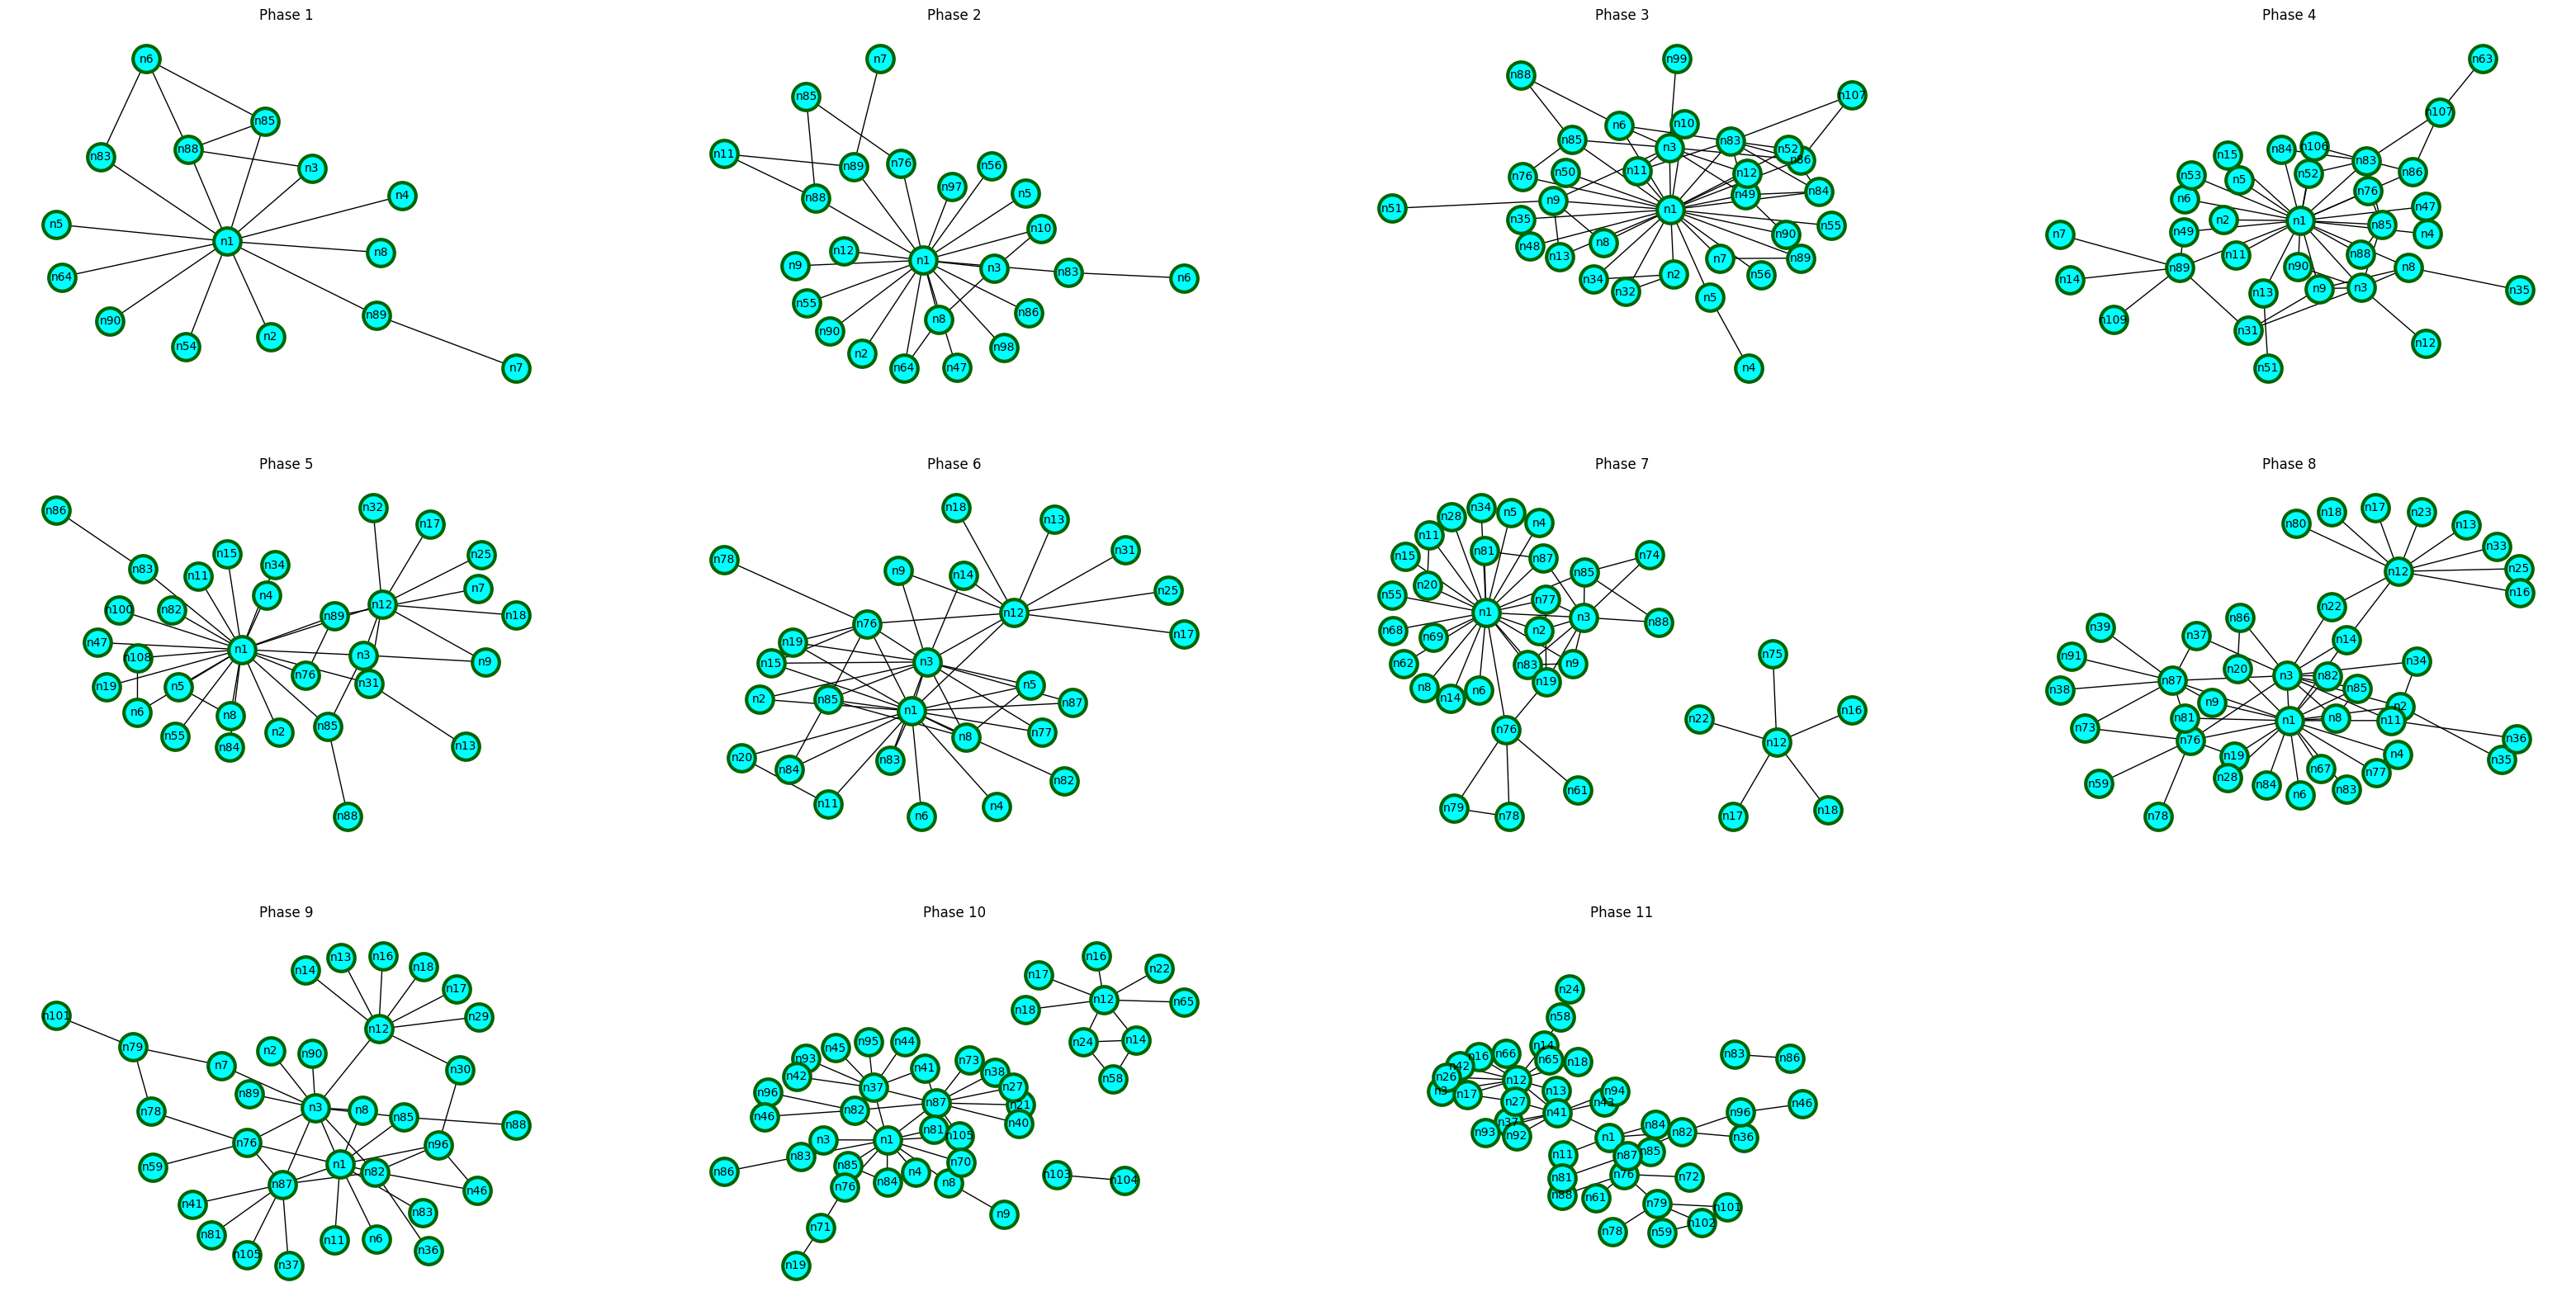

In [151]:
# Visualizando la evolución en todas las fases
options = {
    "font_size": 10,
    "node_size": 550,
    "node_color": "cyan",
    "edgecolors": "darkgreen",
    "linewidths": 3}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))
ax = axes.flatten()
for i, sub_ax in zip(range(1,12), ax):
  nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), **options, with_labels=True, ax = sub_ax)
  sub_ax.set_axis_off()
  sub_ax.set_title('Phase {}'.format(i))
ax[10].margins(0.20)
fig.delaxes(ax[11])

## ANÁLISIS


In [152]:
#1. Cuantos nodos y bordes hay en la red en cada fase:
G_summaries
for i in range(1,12):
  print ('Fase ',i)
  print('Nodos: ',G[i].number_of_nodes())
  print('Bordes: ',G[i].number_of_edges())
  print('   ')


Fase  1
Nodos:  15
Bordes:  18
   
Fase  2
Nodos:  24
Bordes:  28
   
Fase  3
Nodos:  33
Bordes:  56
   
Fase  4
Nodos:  33
Bordes:  48
   
Fase  5
Nodos:  32
Bordes:  39
   
Fase  6
Nodos:  27
Bordes:  47
   
Fase  7
Nodos:  36
Bordes:  49
   
Fase  8
Nodos:  42
Bordes:  58
   
Fase  9
Nodos:  34
Bordes:  44
   
Fase  10
Nodos:  42
Bordes:  50
   
Fase  11
Nodos:  41
Bordes:  50
   


In [153]:
#2. ¿Cuál es el nodo con mayor grado de centralidad en la red global en todas las fases? ¿Y en cada fase?
#(Numero de conexiones)
global_max_degree_node = None
global_max_degree = -1

for phase, graph in G.items():
    degree_centrality = nx.degree_centrality(graph)
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    max_degree = degree_centrality[max_degree_node]

    if max_degree > global_max_degree:
        global_max_degree_node = max_degree_node
        global_max_degree = max_degree

    print(f"Fase {phase}: Nodo con mayor grado de centralidad = {max_degree_node} (Grado = {max_degree:.4f})")

print(f"Nodo global con mayor grado de centralidad = {global_max_degree_node} (Grado = {global_max_degree:.4f})")

Fase 1: Nodo con mayor grado de centralidad = n1 (Grado = 0.8571)
Fase 2: Nodo con mayor grado de centralidad = n1 (Grado = 0.8261)
Fase 3: Nodo con mayor grado de centralidad = n1 (Grado = 0.8438)
Fase 4: Nodo con mayor grado de centralidad = n1 (Grado = 0.7188)
Fase 5: Nodo con mayor grado de centralidad = n1 (Grado = 0.7097)
Fase 6: Nodo con mayor grado de centralidad = n1 (Grado = 0.6923)
Fase 7: Nodo con mayor grado de centralidad = n1 (Grado = 0.6857)
Fase 8: Nodo con mayor grado de centralidad = n1 (Grado = 0.4878)
Fase 9: Nodo con mayor grado de centralidad = n3 (Grado = 0.3333)
Fase 10: Nodo con mayor grado de centralidad = n1 (Grado = 0.3171)
Fase 11: Nodo con mayor grado de centralidad = n12 (Grado = 0.3000)
Nodo global con mayor grado de centralidad = n1 (Grado = 0.8571)


In [154]:
#¿Cuál es el nodo con mayor intermediación de centralidad en la red global en todas las fases? ¿Y en cada fase?
#¿Qué información adicional podría proporcionar la centralidad de intermediación en comparación con
#otras medidas de centralidad, y cómo podría aplicarse específicamente al "Proyecto Caviar"?
global_max_betweenness_node = None
global_max_betweenness = -1

for phase, graph in G.items():
    betweenness_centrality = nx.betweenness_centrality(graph)
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    max_betweenness = betweenness_centrality[max_betweenness_node]

    if max_betweenness > global_max_betweenness:
        global_max_betweenness_node = max_betweenness_node
        global_max_betweenness = max_betweenness

    print(f"Fase {phase}: Nodo con mayor intermediación de centralidad = {max_betweenness_node} (Intermediación = {max_betweenness:.4f})")

print(f"Nodo global con mayor intermediación de centralidad = {global_max_betweenness_node} (Intermediación = {global_max_betweenness:.4f})")

Fase 1: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.9066)
Fase 2: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.9427)
Fase 3: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8295)
Fase 4: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8393)
Fase 5: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.8839)
Fase 6: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5426)
Fase 7: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5894)
Fase 8: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.5537)
Fase 9: Nodo con mayor intermediación de centralidad = n3 (Intermediación = 0.5762)
Fase 10: Nodo con mayor intermediación de centralidad = n1 (Intermediación = 0.3427)
Fase 11: Nodo con mayor intermediación de centralidad = n41 (Intermediación = 0.5541)
Nodo global con mayor intermediación de centralidad = n1 (Intermediación 

3. **¿Cuál es el nodo con mayor intermediación de centralidad en la red global en todas las fases? ¿Y en cada fase? ¿Qué información adicional podría proporcionar la centralidad de intermediación en comparación con otras medidas de centralidad, y cómo podría aplicarse específicamente al "Proyecto Caviar"?**

3.1 Podemos observar que el nodo1 tiene la mayor influencia en la conexión en cada una de las fases (exceptuando fas 9 y fase 11). Sin embargo, en el nodo global tiene el mayor valor de "betweenness_node", esto representa una influencia muy significativa en la red, tuvo un papel crucial en la red, ya que ha actuado como puente de conexión más corto entre los nodos de la red.\
3.2 La centralidad de intermediación se diferencia de otras medidas de centralidad en que esta nos proporciona la información de como se desarrollan los nodos como intermediarios, es decir, de su importancia como puente comunicativo entre otros nodos.
\
3.3 En el proyecto Caviar podemos interpretarlo como que el Nodo1 fue clave en la comunicación eficiente de la red. Si eliminabamos al Nodo1 en las fases donde obtuvo el mayor grado de intermediación de centralidad pudo tener un impacto significativo en la conectividad y coordinación, desequilibrando la organización.



**4. ¿Hay nodos que hayan aumentado su centralidad de intermediación después de una incautación importante?**

SI.
En el caso se llevaron 11 incautaciones, siendo las fases 4, 7, 9, 11 las más significativas. Desde la fase 4 reorganizaron toda la red.
Observando la medida de intermediación de centralidad, vemos que el Nodo1 era la pieza clave, sin embargo en la fase 9 (donde fueron incautados), el nodo3 jugaba un papel clave; luego en la fase 11 (donde tambien fueron incautados), el nodo41 era quien conectaba más nodos.
Si bien es cierto el nodo41 sobresalió en la fase 11, en los gráficos de la evolución notamos que el nodo3 ha sido clave en la mayoría de las fases, al igual que el nodo12.

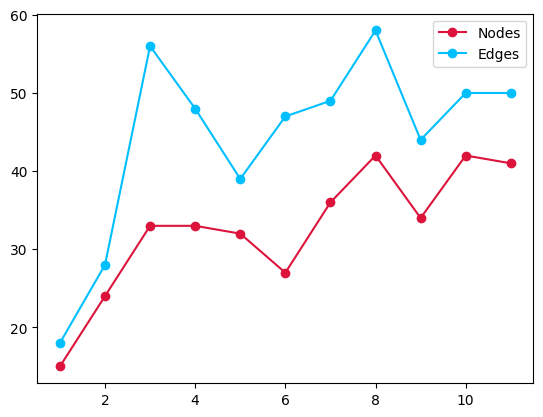

In [157]:
#5. ¿Cómo cambia la red a lo largo de las fases? ¿Se observan patrones en la evolución?
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes",marker='o', color = 'crimson')
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges", marker='o', color = 'deepskyblue')
plt.legend()
plt.show()

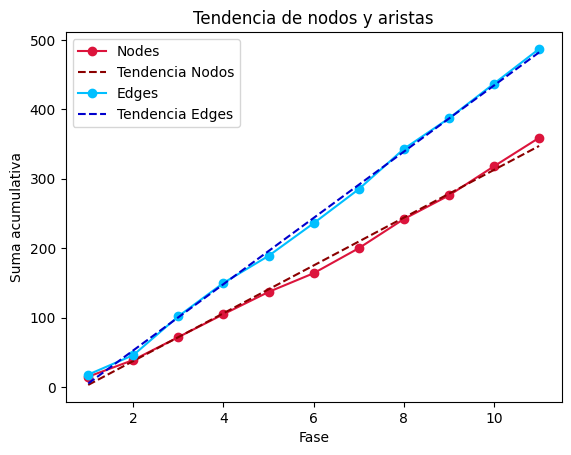

In [159]:
import numpy as np
import matplotlib.pyplot as plt
cumulative_nodes = [sum(G[i].number_of_nodes() for i in range(1, j+1)) for j in range(1, 12)]
cumulative_edges = [sum(G[i].number_of_edges() for i in range(1, j+1)) for j in range(1, 12)]

nodes_trend = np.polyfit(range(1, 12), cumulative_nodes, 1)
edges_trend = np.polyfit(range(1, 12), cumulative_edges, 1)

plt.plot(range(1, 12), cumulative_nodes, label="Nodes", marker='o', color='crimson')
plt.plot(range(1, 12), np.polyval(nodes_trend, range(1, 12)), '--', color='darkred', label='Tendencia Nodos')

plt.plot(range(1, 12), cumulative_edges, label="Edges", marker='o', color='deepskyblue')
plt.plot(range(1, 12), np.polyval(edges_trend, range(1, 12)), '--', color='mediumblue', label='Tendencia Edges')

plt.legend()
plt.xlabel('Fase')
plt.ylabel('Suma acumulativa')
plt.title('Tendencia de nodos y aristas')
plt.show()


**5 ¿Cómo cambia la red a lo largo de las fases? ¿Se observan patrones en la evolución**?
\
Revisando el gráfico de colores anterior y el gráfico de tendencia, se observa que la cantidad de nodos y edges tienden a incrementarse al transcurrir las fases.

Se observa que los network en cada fase son diferentes e intenta adaptarse al cambio, variando la intermediación de centralidad de los nodos y apareciendo nuevos nodos con mayores valores de intermediación lo que indica que la organización criminal buscaba otros contactos para movilizar la droga.

6. **¿Cómo se relaciona la evolución de la red con las incautaciones realizadas en cada fase?. Explicar**
- La evolución de la red cambia con las incautaciones, disminuyendo momentaneamente sus nodos y enlaces, para luego incrementarse. Además se observa que los valores de intermediación de centralidad también varian apareciendo nuevos actores (nodos) para intentar mantener el negocio de la organización criminal.

- Se observa como el cabecilla 'Daniel Serero' pierde peso en la organización mientras la cantidad de actores se incrementa. Decremento del valor de intermediación de centralidad e incremento de nodos.

- La aparición de nuevos nodos reflejan la aparición de nuevas rutas para mover su mercancía. Por ejemplo, despues de la primera incautación, se observa como el nodo n12 incrementa su intermediación de centralidad ya que es un intermediador entre colombianos y Serero.

- Se observa que en la fase 10, la organización queda dividida, sin embargo en la fase 11 recupera conexión, siendo el enlace entre n1 y n41 vital (sin redundancia) para la organización.

- Se observa que despues de la última incautación, toman relevancia otros personajes como n12, y n76 quienes son personajes de intermediación y recuperación de la mercancía. Además, se ve que en esta fase, n1 sigue perdiendo relevancia (intermediación de centralidad).

Text(0.5, 1.0, 'Estructura de la red')

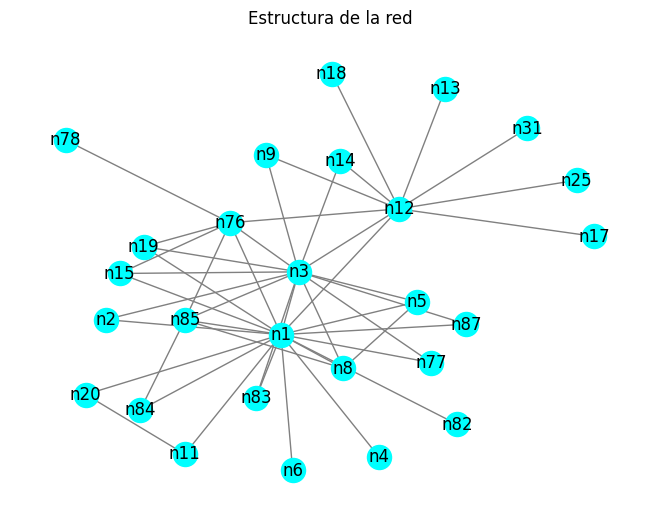

In [171]:
#7. Para cualquiera de las fases, es posible hallar aquellos nodos o aquellos enlaces que son necesarios romper para desarticular la organización? Elija una fase y muestre los resultados.


#Visualizaciones de la red 6:
nx.draw(G[6], pos=nx.drawing.nx_agraph.graphviz_layout(G[6]),node_color='cyan', edge_color='gray', with_labels=True)
plt.title("Estructura de la red - Fase 6")

In [173]:
#Minimo número de nodos a eliminar para desconectar el grafo:
nx.node_connectivity(G[6])

1

In [175]:
nx.minimum_node_cut(G[6])

{'n1'}

Text(0.5, 1.0, 'Estructura de la red')

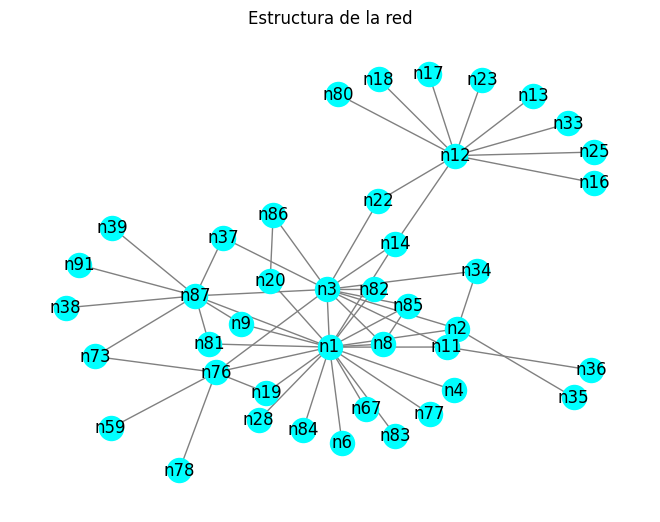

In [172]:
#Visualizacion de la red 8:
nx.draw(G[8], pos=nx.drawing.nx_agraph.graphviz_layout(G[8]),node_color='cyan', edge_color='gray', with_labels=True)
plt.title("Estructura de la red - Fase 8")

In [174]:
#Minimo número de nodos a eliminar para desconectar el grafo:
nx.node_connectivity(G[8])

1

In [176]:
nx.minimum_node_cut(G[8])

{'n1'}

In [177]:
#Desconectando el nodo1 en Grafo 8:
node_to_remove = 'n1'
# Eliminar el nodo
G_removed = G[8].copy()
G_removed.remove_node(node_to_remove)
# Obtener las componentes conectadas restantes
components = list(nx.connected_components(G_removed))
components

[{'n4'},
 {'n83'},
 {'n11',
  'n12',
  'n13',
  'n14',
  'n16',
  'n17',
  'n18',
  'n19',
  'n2',
  'n20',
  'n22',
  'n23',
  'n25',
  'n3',
  'n33',
  'n34',
  'n35',
  'n36',
  'n37',
  'n38',
  'n39',
  'n59',
  'n73',
  'n76',
  'n78',
  'n8',
  'n80',
  'n81',
  'n82',
  'n85',
  'n86',
  'n87',
  'n9',
  'n91'},
 {'n6'},
 {'n84'},
 {'n77'},
 {'n28'},
 {'n67'}]

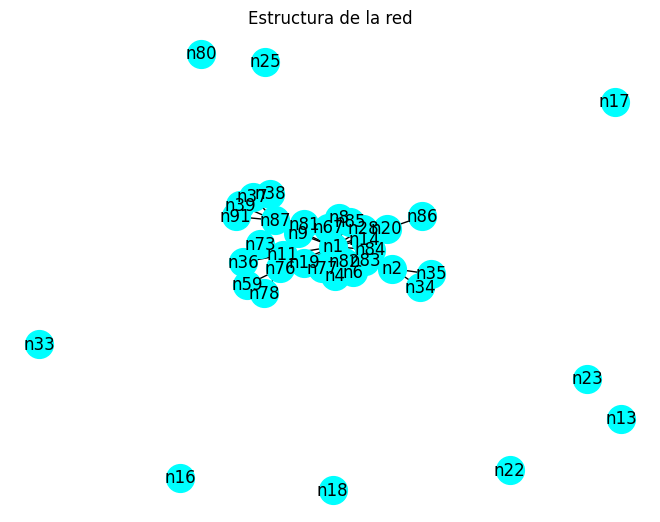

In [193]:
pos = nx.spring_layout(G_removed)
nx.draw(G_removed, pos, with_labels=True, node_color='cyan', node_size=400)
plt.title("Estructura de la red")
plt.show()

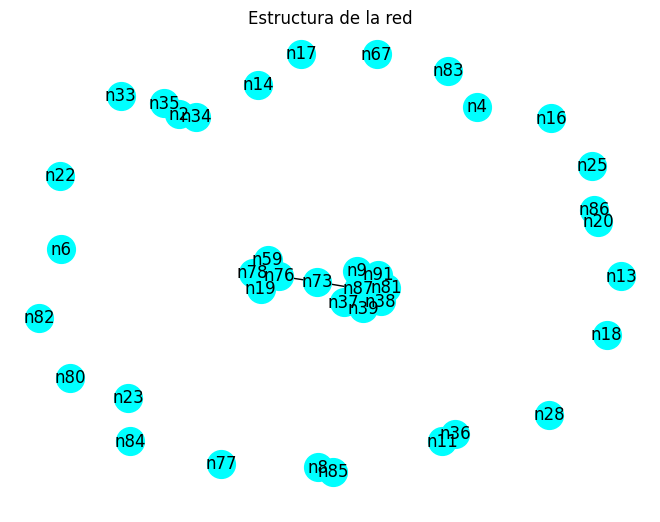

In [194]:
#si eliminamos n3, n12 en GRAFO8:
node_to_remove_n3 = 'n3'
node_to_remove_n12 = 'n12'
# Eliminar el nodo
G_removed = G[8].copy()
G_removed.remove_node(node_to_remove)
G_removed.remove_node(node_to_remove_n3)
G_removed.remove_node(node_to_remove_n12)
pos = nx.spring_layout(G_removed)
nx.draw(G_removed, pos, with_labels=True, node_color='cyan', node_size=400)
plt.title("Estructura de la red")
plt.show()

In [183]:
#Por el análisis del inciso 4, desconectamos n1, n3, n12 en el GRAFO 6:
node_to_remove_1='n1'
node_to_remove_3='n3'
node_to_remove_12='n12'
# Eliminar el nodo
G_removed_1 = G[6].copy()
G_removed_1.remove_node(node_to_remove_1)
G_removed_1.remove_node(node_to_remove_3)
G_removed_1.remove_node(node_to_remove_12)
# Obtener las componentes conectadas restantes
components = list(nx.connected_components(G_removed))
components

[{'n4'},
 {'n83'},
 {'n11',
  'n12',
  'n13',
  'n14',
  'n16',
  'n17',
  'n18',
  'n19',
  'n2',
  'n20',
  'n22',
  'n23',
  'n25',
  'n3',
  'n33',
  'n34',
  'n35',
  'n36',
  'n37',
  'n38',
  'n39',
  'n59',
  'n73',
  'n76',
  'n78',
  'n8',
  'n80',
  'n81',
  'n82',
  'n85',
  'n86',
  'n87',
  'n9',
  'n91'},
 {'n6'},
 {'n84'},
 {'n77'},
 {'n28'},
 {'n67'}]

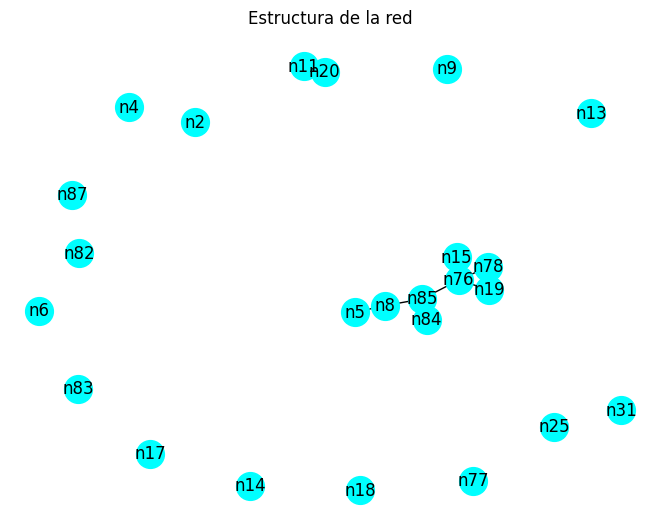

In [185]:
pos = nx.spring_layout(G_removed_1)
nx.draw(G_removed_1, pos, with_labels=True, node_color='cyan', node_size=400)
plt.title("Estructura de la red")
plt.show()

**7. Para cualquiera de las fases, es posible hallar aquellos nodos o aquellos enlaces que son necesarios romper para desarticular la organización? Elija una fase y muestre los resultados.**
\
En el GRAFO 8 se observa que eliminando el nodo1 (el cual es el mínimo) dejamos desarticulados a 7 nodos. Si tenemos en cuenta el analisis y eliminamos los nodos 1, 3, 12, quedan desarticulados 27 nodos.
\
En el GRAFO 6, desarticulando nodos claves: 1, 3, 12, dejamos desarticulados 16 nodos.

In [186]:
#8. ¿Qué nodos actúan como puentes o intermediarios entre diferentes comunidades en cada fase?
for i in range(1,12):
  betweenness_centrality = nx.betweenness_centrality(G[i])
  intermediario = max(betweenness_centrality, key=betweenness_centrality.get)
  print(f'El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase {i}, es el nodo:',intermediario)

El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 1, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 2, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 3, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 4, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 5, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 6, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 7, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 8, es el nodo: n1
El nodo que actúa como puente o intermediario entre diferentes comunidades, en la fase 9, es el nodo: n3
El nodo que actúa como puente o intermediario entre dif

**8. ¿Qué nodos actúan como puentes o intermediarios entre diferentes comunidades en cada fase?**
La centralidad de intermediación de un nodo mide en qué medida ese nodo actúa como intermediario en los caminos más cortos entre otros nodos o comunidades de la red.
Como se observa en la línea de código anterior, los nodos que actúan como puentes en cada fase son: n1 para las fases 1, 2, 3, 4, 5, 6, 7, 8, y 10; n3 para la fase 9; y n41 para la fase 11

In [187]:
#9. Explica el concepto de centralidad de cercanía (closeness centrality). ¿Cómo podría la centralidad de cercanía ser relevante para identificar nodos clave en la red de importadores?
for i in range(1,12):
  closeness_centrality = nx.closeness_centrality(G[i])
  centralidad = max(closeness_centrality, key=closeness_centrality.get)
  print(f'El nodo con mayor centralidad de cercanía en la fase {i}, es el nodo:', centralidad)

El nodo con mayor centralidad de cercanía en la fase 1, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 2, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 3, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 4, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 5, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 6, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 7, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 8, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 9, es el nodo: n3
El nodo con mayor centralidad de cercanía en la fase 10, es el nodo: n1
El nodo con mayor centralidad de cercanía en la fase 11, es el nodo: n41


In [190]:
import plotly.express as px

for i in range(1,12):
  closeness_centrality = nx.closeness_centrality(G[i])
  betweenness_centrality = nx.betweenness_centrality(G[i])
  centralities_d = pd.DataFrame({
          'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality})

  print(f'Fase {i}')
  fig = px.scatter(centralities_d, x='Betweenness Centrality', y='Closeness Centrality', width=900, text=centralities_d.index)
  fig.update_traces(textposition='top center')
  fig.show()

Fase 1


Fase 2


Fase 3


Fase 4


Fase 5


Fase 6


Fase 7


Fase 8


Fase 9


Fase 10


Fase 11


9. Explica el concepto de centralidad de cercanía (closeness centrality). ¿Cómo podría la centralidad de cercanía ser relevante para identificar nodos clave en la red de importadores?
- Steve Cunha (n96) y Ernesto Morales (n12) son el importador y el organizador de las importación. Como se observan en los gráficos. El nodo n12 empieza a tener relevancia a partir de la fase 5 y el nodo n96 a partir de la fase 9.
- Estas relevancias se explican por el incremento del 'Betweenness Centrality' y el 'Closeness Centrality', y el fenómeno aparece luego de las incautaciones.
- Al tener un valor alto de 'Closeness Centrality', significa que los nodos alrededor tienen una cercanía notoria a este nodo y por ende si este nodo es capturado, hay mayor probabilidad de que brinde mayor información de los demás nodos que se encontraban cerca. (iniciando con este nodo se obtendría el camino más corto para llegar al resto de nodos).